## B10703049 財金二 柯宥圻
## Homework 5
## Question 1
The question ask us to find the proper packages in Python to perform LASSO and Ridge regression on the ORL face dataset.

As we perform in Homework 2, we can see that the definition of these ORL face photos are 46*56, however, we have only 400 pictures, which means p >> n, and we can't get the result of this problem, because it will be infinity values, and it do not have the meanings from the perspective of linear algebra.

Therefore, we should take some dimension reductions method to find the important pixels abd try to cut the redundant dimensions.

We do the same things in Homework 2 first, decompose photos into 1-D vectors:

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
gender = [0,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
data = []
for i in range(1, 41):
    for j in range(1,11):
        image_dir = f"/content/drive/MyDrive/DA/ORL Faces/{i}_{j}.png"
        img = Image.open(image_dir)
        img_array = np.asarray(img)
        img_array = np.append(img_array, gender[i-1])
        data.append(img_array.flatten())
data = np.array(data)
data_transpose = np.transpose(data)

We take advantage of LASSO and use the Lasso to find the best pixels to detect the face is man or woman. The official document suggest me to use alpha = 0.1. Adter fitting X and y into lasso, it can calculate lasso.coef_ and we can find those parameters which is not 0. There are 201 non-0 parameters, and we present 50 parameters which is the largest. (regardless of the sign)

After that, we use matplotlib.pyplot to generate the visualized scatter plot where indicates the pixels explaining most percent of the result. In other words, the machine can detect the sex of one photo by these important pixels.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.596e-02, tolerance: 4.375e-03
  model = cd_fast.enet_coordinate_descent(


top_indices:  [  86   89 2157   44 1004  493   94 2116 1369  179 1730  139 1387  279
 1795  554 2515 2030 1833 2167 1928  693  201 1062 1935  370 1845 1923
 1427 2286 1069  241  245 1467  386 2485 1304 1475 2182  430  620 1223
  486 1789 1560 1516  515 2253 2470 1151]


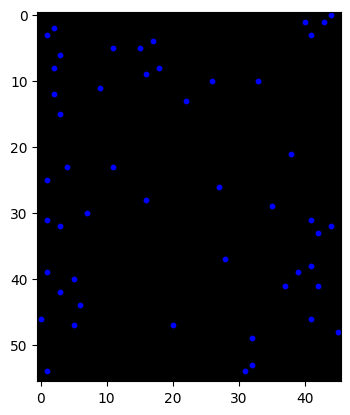

In [20]:
#LASSO
# Separate features and labels
X = data[:,:-1]
y = data[:,-1]

# Create Lasso model and train on the training set
from sklearn.linear_model import Lasso
lasso = Lasso(0.1)
lasso.fit(X, y)

top_indices = np.argsort(np.abs(lasso.coef_))[::-1][:50]
print("top_indices: ", top_indices)

plt.imshow(np.zeros((56, 46)), cmap="copper")
plt.scatter([num % 46 for num in top_indices],[num // 46 for num in top_indices], c="blue", s=10)
plt.show()

With similar concept, we can find the important pixeles with Ridge regression: 

top_indices:  [1069 2116 1151 2167 1004  370 2157 1105 2485 2310 1730 1928  873 2539
 2045 1712 1311  324 1845  179 1772  693 1187 1773 1795 2346 1427 1291
 1122 2264 1934 1210 1657 1891  554 2073   44  493  202 2111  645 1003
  939 1758 2213 1974  183   45  132 2110]


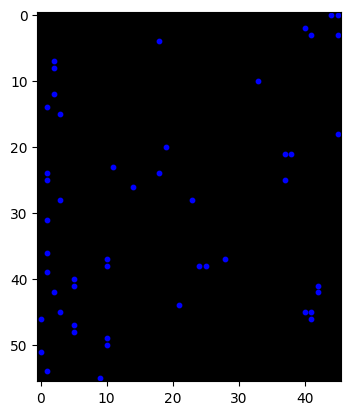

In [21]:
X = data[:,:-1]
y = data[:,-1]
X_normal = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

from sklearn.linear_model import Ridge
ridge = Ridge(1)
ridge.fit(X_normal, y)

top_indices = np.argsort(np.abs(ridge.coef_))[::-1][:50]
print("top_indices: ", top_indices)

plt.imshow(np.zeros((56, 46)), cmap="copper")
plt.scatter([num % 46 for num in top_indices],[num // 46 for num in top_indices], c="blue", s=10)
plt.show()

There are reasons why I chose alpha=0.1 for Lasso and alpha=1 for Ridge, but the specific values of alpha depend on the dataset, and I experiment with different values to find the best one for this problem.

In general, the alpha parameter controls the strength of regularization in both Lasso and Ridge regression. A higher value of alpha leads to stronger regularization, which can help prevent overfitting. Conversely, a lower value of alpha leads to weaker regularization, which can allow the model to fit the training data more closely but may lead to overfitting if the value is too low.

In previous examples, I chose alpha=0.1 for Lasso because I wanted to have a moderate level of regularization that would help prevent overfitting but still allow the model to fit the data fairly closely. For Ridge regression, I chose alpha=1 because Ridge tends to require higher values of alpha than Lasso to achieve similar levels of regularization.

In stepwise regression, we take quite a few minute to findout the best pixels in the photo, and it can't find 50 (or more) important pixels, because it will take too much time. However, in Ridge and Lasso, we can find the best 50 pixels in these photos, and they show quite similar important pixels. Due to the inconsistency of the stepwise regression, Lasso and RIdge, it is hard to find the different pattern among them.

### Qustion 2
The core issue in this cobb-douglas production function is that we can use the logarithmic transformation of the production function to find the parameters beta0 and beta1. Taking the natural logarithm of both sides of the model, we get:

log(V_t) = log(α) + beta0xlog(K_t) + beta1xlog(L_t) + log(η_t), where log(η_t) is the residual form, and it can be the residual between estimator and real value. Our goal is to let the η_t as small as possible.

This is now a linear model in the parameters beta0 and beta1, with log(V_t), log(K_t), and log(L_t) as the independent variables. We can estimate them by fitting a linear regression model to the data, using Python.



In [22]:
import statsmodels.api as sm
data = pd.read_csv("/content/drive/MyDrive/DA HW5-2.csv")

# Define the dependent variable and the independent variables
y = np.log(data['value_added'])
X = np.log(data[['capital', 'labor']])
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()
print(model.summary())
print('p =', model.params['capital'])
print('q =', model.params['labor'])

                            OLS Regression Results                            
Dep. Variable:            value_added   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     27.01
Date:                Sat, 01 Apr 2023   Prob (F-statistic):           3.61e-05
Time:                        12:49:14   Log-Likelihood:                 19.258
No. Observations:                  15   AIC:                            -32.52
Df Residuals:                      12   BIC:                            -30.39
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6262      2.897     -3.323      0.0

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The Cobb-Douglas production function takes the form:
V_t = α * K_t^beta0 * L_t^beta1 * η_t

where:

*   V_t is the total output (or value of production) at time t
*   K_t is the amount of capital used at time t
*   L_t is the amount of labor used at time t

α and η_t are parameters that represent, respectively, the level of technology and the state of the natural environment at time t
p and q are the exponents that determine the elasticity of output with respect to capital and labor, respectively.

The output of this code is a summary of the linear regression model, including the estimates of beta0 and beta1, which are 0.5 and 0.84.


However, we have a constraint: beta0 plus beta1 should equal to 1. This constraint implies that the elasticity of output with respect to capital is equal to 1 - the elasticity of output with respect to labor.
Therefore, we use the minimize function in scipy.optimize package to find the beta0 and beta1 which is 1, adding together.


In [23]:
from scipy.optimize import minimize
def MSE(params):
    alpha, p, q = params
    errors = y - alpha - p*X['capital'] - q*X['labor']
    return np.sum(errors**2)

def constraint(params):
    return params[1] + params[2] - 1

problem = {'fun': MSE, 'x0': np.zeros(3), 'constraints': {'type': 'eq', 'fun': constraint}}
result = minimize(**problem)
alpha, p, q = result.x
print(f'p = {p}')
print(f'q = {q}')
print(f'alpha = {alpha}')

p = 0.016884631564150675
q = 0.9831153684358492
alpha = -4.713005373447837


When p and q are both between 0 and 1, the production function exhibits **diminishing marginal productivity**. That is, as more units of a factor of production are added, the additional output generated by each additional unit of that factor becomes smaller and smaller. This property is consistent with many observed production processes, where the productivity of labor and capital tends to decline as more of these inputs are used.

In this case, the answer p and q (which is beta0 and beta1) are calculated under the constraints params[1] + params[2] - 1.

### Question 3

Perform Principal Component Analysis on the input data matrix X.

Parameters:
-----------
X : array-like, shape (n_samples, n_features)
    Input data matrix.
isCorrMX : bool
    If True, use correlation matrix for PCA, else use covariance matrix.

Returns:
--------
loading_matrix : array-like, shape (n_features, n_components)
    Loading matrix containing the eigenvectors of the selected components.
eigenvalues : array-like, shape (n_components,)
    Eigenvalues of the selected components.
score_matrix : array-like, shape (n_samples, n_components)
    Matrix of principal components.
scree_plot : array-like, shape (n_components, 2)
    Scree plot containing the eigenvalues and cumulative variance explained.

The code performs principal component analysis (PCA) on the input data X. PCA is a technique used to reduce the dimensionality of a dataset by identifying the directions of maximum variance, called principal components, and projecting the data onto these components.

The pca function takes in an input matrix X and a boolean isCorrMX, which determines whether to compute the covariance or correlation matrix, and the code computes the covariance or correlation matrix of the input matrix X, depending on the value of isCorrMX.

Then, it computes the eigenvalues and eigenvectors of the covariance/correlation matrix using the NumPy linalg.eig function. It then sorts the eigenvalues and eigenvectors in descending order of eigenvalue magnitude and removes any imaginary components from the result using the np.real function.

* The first principal component is stored in first_pc, and the matrix of eigenvectors, called the loading matrix, is stored in loading_matrix.

* The score matrix is computed by projecting the input matrix X onto the principal components in the loading matrix.

* The scree plot is computed by first initializing an array of zeros called scree_plot. The first column of this array is filled with the sorted eigenvalues, and the second column is filled with the cumulative sum of the eigenvalues divided by their sum.

Last, we generates a scree plot of the eigenvalues using the Matplotlib library. The scree plot shows the variance explained by each principal component, as well as the cumulative percentage of variance explained by all the principal components up to that point.

Loading Matrix:
 [[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues:
 [2.91849782 0.91403047 0.14675688 0.02071484]

Score Matrix:
 [[ 2.64026976e+00 -5.20404130e+00 -2.48862071e+00 -1.17033159e-01]
 [ 2.67073030e+00 -4.66690995e+00 -2.46689833e+00 -1.07535605e-01]
 [ 2.45460631e+00 -4.77363639e+00 -2.28832134e+00 -1.04349860e-01]
 [ 2.54551709e+00 -4.64846339e+00 -2.21237760e+00 -2.78417376e-01]
 [ 2.56122842e+00 -5.25862910e+00 -2.39222589e+00 -1.55512749e-01]
 [ 2.97594579e+00 -5.70732073e+00 -2.43724544e+00 -2.23766470e-01]
 [ 2.46315720e+00 -4.92969712e+00 -2.08984843e+00 -1.82965623e-01]
 [ 2.67313922e+00 -5.07641913e+00 -2.42688961e+00 -2.10955749e-01]
 [ 2.43713208e+00 -4.38587157e+00 -2.13155333e+00 -2.25827783e-01]
 [ 2.64535121e+00 -4.75499447e+00 -2.49167478e+00 -2.52391205e-01]
 [ 2.80076135e+00 -5.50437488e+

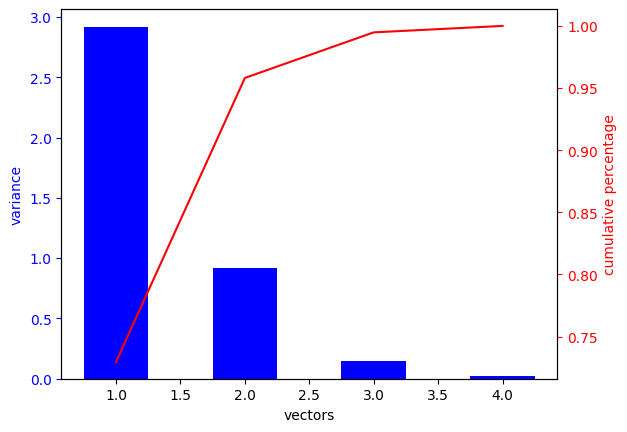

In [24]:
# Question 5-3
def pca(X, isCorrMX=True):

    # Compute the covariance/correlation matrix
    if isCorrMX:
        cov_mx = np.corrcoef(X.T)
    else:
        cov_mx = np.cov(X.T)
    
    eigvals, eigvecs = np.linalg.eig(cov_mx)
    sort_idx = np.argsort(eigvals)[::-1]
    eigvals = np.real(eigvals[sort_idx])
    eigvecs = np.real(eigvecs[:, sort_idx])
    first_pc = eigvecs[:, 0]
    loading_matrix = eigvecs

    # Compute the score matrix
    score_matrix = np.dot(X, loading_matrix)

    # Compute the scree plot
    scree_plot = np.zeros((len(eigvals), 2))
    scree_plot[:, 0] = eigvals
    scree_plot[:, 1] = np.cumsum(eigvals) / np.sum(eigvals)

    # draw
    vectors = []
    for i in range(len(scree_plot[:, 0])):
        vectors.append(i+1)
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('vectors')
    ax1.bar(vectors,scree_plot[:, 0],color='b',width=0.5)
    ax1.set_ylabel('variance',color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    ax2.plot(vectors,scree_plot[:, 1],'r-')
    ax2.set_ylabel('cumulative percentage',color='r')
    ax2.tick_params('y', colors='r')
    return loading_matrix, eigvals, score_matrix, scree_plot

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

# Apply PCA using our custom function
loading_matrix, eigenvalues, score_matrix, scree_plot = pca(X, isCorrMX=True)

# Print the results
print("Loading Matrix:\n", loading_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nScore Matrix:\n", score_matrix)
print("\nScree Plot:\n", scree_plot)
plt.show()

We use the Iris dataset to see whether it performs well. It seems to be great!
Then, we download autompg dataset and see if the function performs great as well, and we need to see whether PCA is scale-relevant.

The following two parts are just easy function to find how many elements we need to explain certain percentage of the model, and draw the plot.

In [25]:
def edge(datas):
    criteria = []
    for i, element in enumerate(datas):
        if element >= 0.5 and len(criteria) == 0:
            criteria.append(i+1)
        if element >= 0.6 and len(criteria) == 1:
            criteria.append(i+1)
        if element >= 0.7 and len(criteria) == 2:
            criteria.append(i+1)
        if element >= 0.8 and len(criteria) == 3:
            criteria.append(i+1)
        if element >= 0.9 and len(criteria) == 4:
            criteria.append(i+1)
            break
    return criteria

In [26]:
def draw_picture(PC):
    first_PC = PC[:, 0]
    min_value = np.min(first_PC)
    max_value = np.max(first_PC)
    scaled_pc = (first_PC - min_value) * (255 / (max_value - min_value))
    scaled_pc_2D = scaled_pc.reshape(56,46)
    img = Image.fromarray(scaled_pc_2D.astype('uint8'))
    img.show() 

We read autompg dataset, drop the irrevelant part, and print the matrices.

     cylinders  displacement  horsepower  weight  acceleration  model year  \
0          8.0         307.0       130.0  3504.0          12.0        70.0   
1          8.0         350.0       165.0  3693.0          11.5        70.0   
2          8.0         318.0       150.0  3436.0          11.0        70.0   
3          8.0         304.0       150.0  3433.0          12.0        70.0   
4          8.0         302.0       140.0  3449.0          10.5        70.0   
..         ...           ...         ...     ...           ...         ...   
393        4.0         140.0        86.0  2790.0          15.6        82.0   
394        4.0          97.0        52.0  2130.0          24.6        82.0   
395        4.0         135.0        84.0  2295.0          11.6        82.0   
396        4.0         120.0        79.0  2625.0          18.6        82.0   
397        4.0         119.0        82.0  2720.0          19.4        82.0   

     origin  
0       1.0  
1       1.0  
2       1.0  
3      

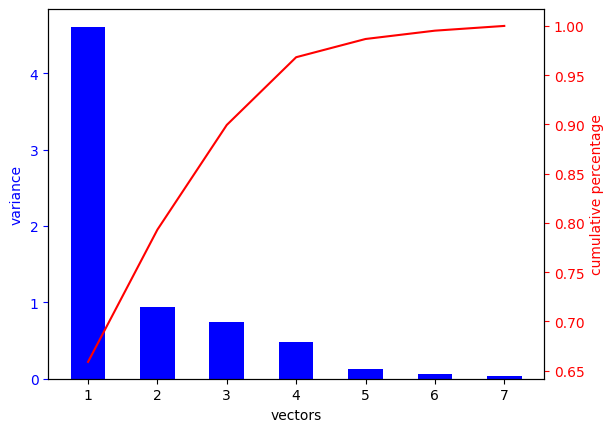

Loading Matrix:
 [[ 1.79262233e-03 -1.33244815e-02 -7.29209804e-03  1.42837791e-03
  -1.71683641e-02  2.85519196e-01 -9.58096063e-01]
 [ 1.14341275e-01 -9.45778439e-01 -3.03257047e-01 -9.20994584e-03
   1.06092977e-02  2.34681580e-03  1.61707371e-02]
 [ 3.89670355e-02 -2.98248416e-01  9.48713803e-01 -4.30779415e-02
   8.64404757e-02 -9.42467988e-03 -7.42175636e-03]
 [ 9.92673415e-01  1.20752748e-01 -2.45320521e-03  1.48633490e-03
  -3.15267236e-03  1.19678424e-04  2.91024612e-04]
 [-1.35283460e-03  3.48258394e-02 -7.70032425e-02  5.95372077e-02
   9.94496232e-01  3.20939275e-03 -1.66762346e-02]
 [-1.33684138e-03  2.38516836e-02 -4.28162289e-02 -9.97249604e-01
   5.55064333e-02 -8.78813785e-04 -2.75161323e-03]
 [-5.51538021e-04  3.24298106e-03  1.24643867e-02 -1.94075866e-03
   2.65997449e-03  9.58317990e-01  2.85393774e-01]]

Eigenvalues:
 [7.32151674e+05 1.51397202e+03 2.61244860e+02 1.09726327e+01
 2.87874868e+00 3.78992691e-01 2.64153387e-01]

Score Matrix:
 [[ 3.51840011e+03  9.597

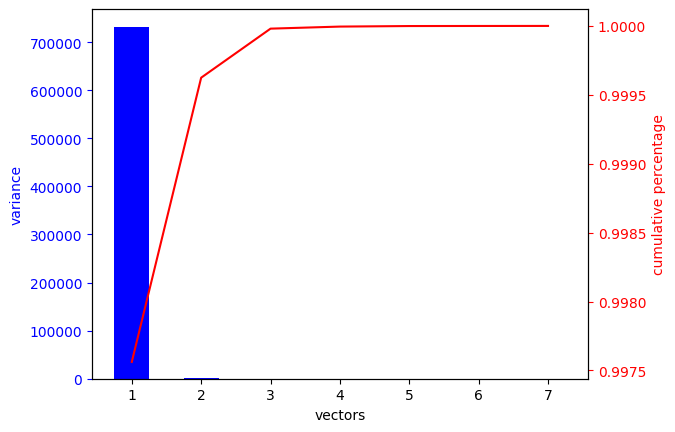

In [27]:
# Question 5-3-b

df = pd.read_csv('/content/drive/MyDrive/DA/auto-mpg.csv')
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
autompg_variables = df.drop(['mpg','car name'], axis=1)
autompg_mpg = df['mpg']
autompg_variables = pd.DataFrame(autompg_variables, dtype=float)
print(autompg_variables)
print(autompg_mpg)

loading_matrix, eigenvalues, score_matrix, scree_plot = pca(autompg_variables, isCorrMX=True)
print("Loading Matrix:\n", loading_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nScore Matrix:\n", score_matrix)
print("\nScree Plot:\n", scree_plot)
plt.show()
#[:, 0]
loading_matrix, eigenvalues, score_matrix, scree_plot = pca(autompg_variables, isCorrMX=False)
print("Loading Matrix:\n", loading_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nScore Matrix:\n", score_matrix)
print("\nScree Plot:\n", scree_plot)
plt.show()

PCA is **not scale-invariant**, which means that the results of PCA can be affected by the scale of the input data. This is because PCA is based on the covariance matrix or correlation matrix, which are sensitive to changes in the scale of the input variables.

Using cov_mx = np.cov(iris.data.T) or cov_mx = np.corrcoef(iris.data.T) to calculate the covariance or correlation matrix can produce different results, depending on the scale of the input data.

It is generally a good practice to standardize the input data before performing PCA, to ensure that the results are not affected by the scale of the variables. Standardization involves subtracting the mean and dividing by the standard deviation of each variable, so that each variable has a mean of 0 and standard deviation of 1.

### Question 4
We use the ORL face dataset again, and find how many elements we need to explain certain percentage of total variances, Then, we try to rescale the first PC into the range of [0,255] and reshape it to 46X56 natrix. Plot an image from the 2d matri as the grayscale values.Ideally, we can get a person-like vague pictures.

Loading Matrix:
 [[ 0.01757966  0.02796559  0.03828835 ... -0.00041141 -0.00476833
  -0.00197805]
 [ 0.01751104  0.02819481  0.03836737 ...  0.00711484 -0.0038529
   0.00010225]
 [ 0.01808453  0.02765299  0.03859395 ... -0.00982114 -0.0011989
  -0.05162485]
 ...
 [-0.0159241   0.00522833  0.01841436 ...  0.00445128 -0.01418149
  -0.00268289]
 [-0.01796103  0.00054265  0.02263794 ... -0.04014493 -0.01083051
  -0.03547093]
 [-0.0184973   0.00106001  0.02486163 ...  0.02095449  0.00762785
   0.02625014]]

Eigenvalues:
 [ 4.36011826e+02  3.33300262e+02  2.19556982e+02 ... -1.29454871e-14
 -1.56951966e-14 -1.78480888e-14]

Score Matrix:
 [[ 5387.46360114  -271.60174079   445.1302504  ...   -23.21182551
    -26.62179482   -24.79150169]
 [ 5436.19359746  -499.56466057   184.5538535  ...   -18.86909718
    -26.06673092   -20.35907898]
 [ 5145.84348769 -1028.39078648   100.90652393 ...   -22.18982976
    -23.66073521   -25.09642907]
 ...
 [ 5880.95149502  -498.7725865    238.57991151 ...   -14.

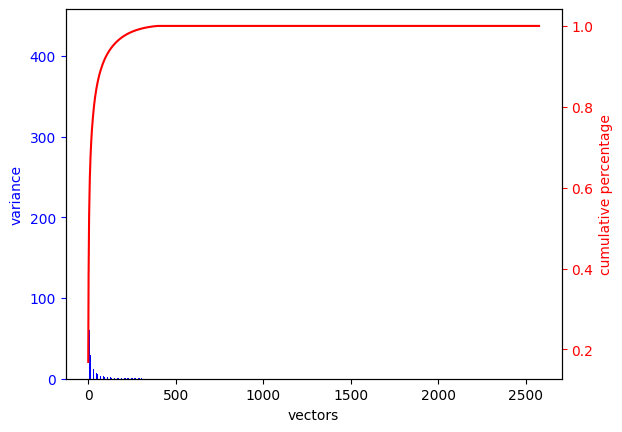

In [28]:
# Question 5-4-a

ORLface_data = []
for i in range(1, 41):
    for j in range(1,11):
        image_dir = f"/content/drive/MyDrive/DA/ORL Faces/{i}_{j}.png"
        img = Image.open(image_dir)
        img_array = np.asarray(img)
        ORLface_data.append(img_array.flatten())
ORLface_data = np.array(ORLface_data)

loading_matrix, eigenvalues, score_matrix, scree_plot = pca(ORLface_data, isCorrMX=True)

print("Loading Matrix:\n", loading_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nScore Matrix:\n", score_matrix)
print("\nScree Plot:\n", scree_plot)

50% explanable: 6  principal components
60% explanable: 9  principal components
70% explanable: 17  principal components
80% explanable: 34  principal components
90% explanable: 79  principal components


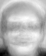

In [29]:
criteria = edge(scree_plot[:, 1])
print("50% explanable:", criteria[0], " principal components")
print("60% explanable:", criteria[1], " principal components")
print("70% explanable:", criteria[2], " principal components")
print("80% explanable:", criteria[3], " principal components")
print("90% explanable:", criteria[4], " principal components")

draw_picture(loading_matrix)

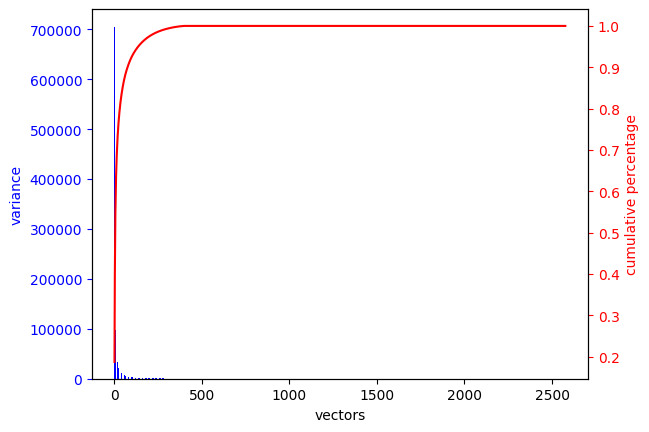

50% explanable: 5  principal components
60% explanable: 9  principal components
70% explanable: 16  principal components
80% explanable: 32  principal components
90% explanable: 76  principal components


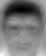

In [30]:
# Question 5-4-b
loading_matrix, eigenvalues, score_matrix, scree_plot = pca(ORLface_data, isCorrMX=False)
plt.show()

criteria = edge(scree_plot[:, 1])
print("50% explanable:", criteria[0], " principal components")
print("60% explanable:", criteria[1], " principal components")
print("70% explanable:", criteria[2], " principal components")
print("80% explanable:", criteria[3], " principal components")
print("90% explanable:", criteria[4], " principal components")

draw_picture(loading_matrix)

We can see that:

Using correlation matrix, they are:

* 50% explanable: 6  principal components
* 60% explanable: 9  principal components
* 70% explanable: 17  principal components
* 80% explanable: 34  principal components
* 90% explanable: 79  principal components

Using covariance matrix, they are:

* 50% explanable: 5  principal components
* 60% explanable: 9  principal components
* 70% explanable: 16  principal components
* 80% explanable: 32  principal components
* 90% explanable: 76  principal components

the covariance matrix is a bit better than correlation matrix.